# TITANIC SURVIVAL PREDICTION

## Importing Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df=pd.read_csv("train.csv")

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualiasation

<Axes: >

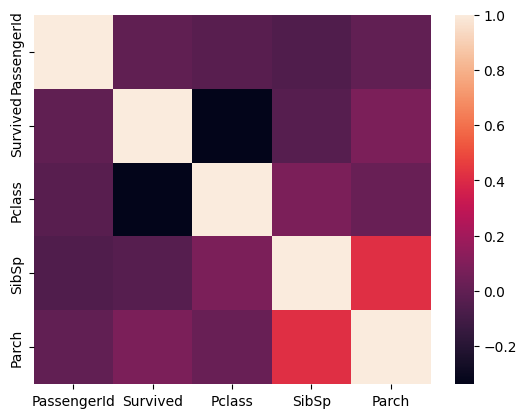

In [48]:
import seaborn as sns
d=df.dtypes
fl=d.iloc[(d=="int64").values].index
sns.heatmap(df[fl].corr())

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices,test_indices in split.split(df,df[['Survived','Pclass','Sex']]):
    train_set=df.loc[train_indices]
    test_set=df.loc[test_indices]

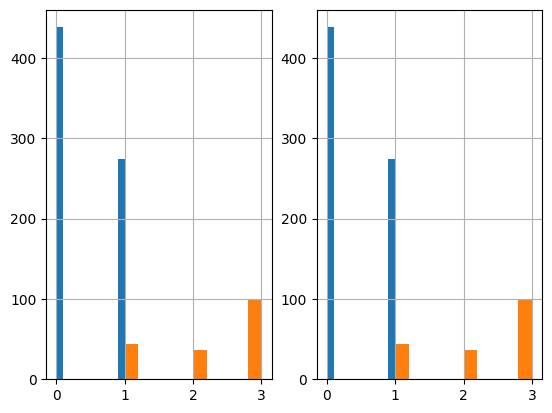

In [50]:
plt.subplot(1,2,1)
train_set['Survived'].hist()
test_set['Pclass'].hist()

plt.subplot(1,2,2)
train_set['Survived'].hist()
test_set['Pclass'].hist()

plt.show()

In [51]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 741 to 779
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          574 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        168 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


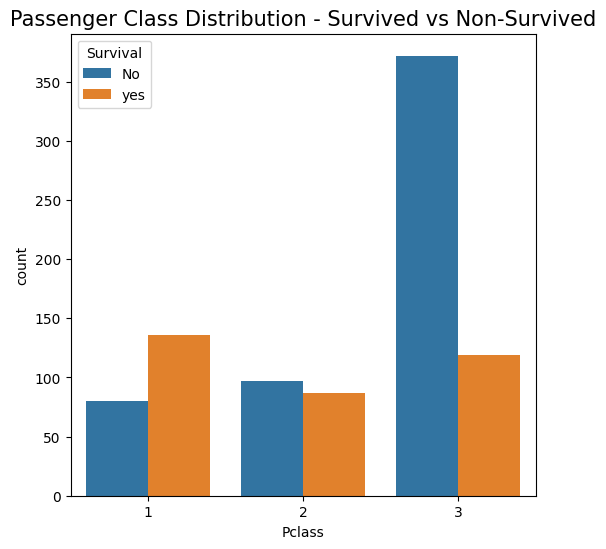

In [52]:
plt.subplots(figsize = (6,6))
ax=sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 15)
leg=ax.get_legend()
leg.set_title('Survival')
legs=leg.texts

legs[0].set_text('No')
legs[1].set_text("yes")

([<matplotlib.axis.XTick at 0x1f6a876d3d0>,
 [Text(1.0, 0, 'Female'), Text(0.0, 0, 'Male')])

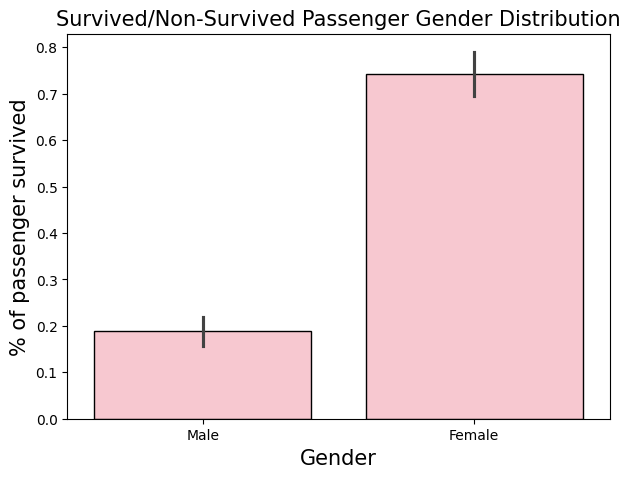

In [53]:
plt.subplots(figsize = (7,5))
sns.barplot(x = "Sex", y = "Survived",color='pink', data=df, edgecolor=(0,0,0), linewidth=1)
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 15)
labels = ['Female', 'Male']
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Gender",fontsize = 15)
plt.xticks(sorted(df.Sex.unique()), labels)


([<matplotlib.axis.XTick at 0x1f6a8773110>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

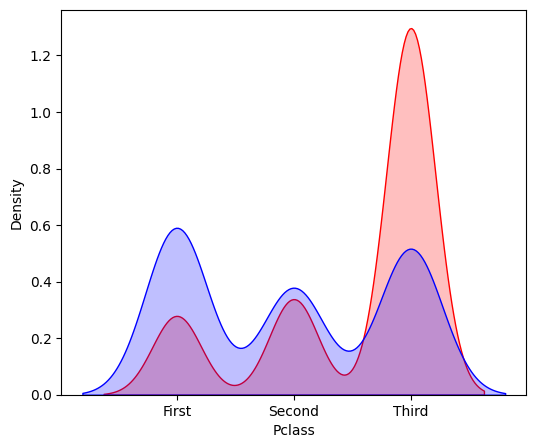

In [54]:
plt.subplots(figsize=(6,5))
sns.kdeplot(df.loc[(df['Survived'] == 0),'Pclass'], fill=True,color='r',label='Not Survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Pclass'], fill=True,color='b',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(df.Pclass.unique()),labels)

## Model Building

In [55]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer
class AgeImputer(BaseEstimator,TransformerMixin):
    def fit (self, X, y=None):
        return self
    def transform(self,X):
        imputer=SimpleImputer(strategy="mean")
        X['Age']=imputer.fit_transform(X[['Age']])
        return X

In [56]:
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator,TransformerMixin):
    def fit (self, X, y=None):
        return self
    def transform(self,X):
        encoder=OneHotEncoder()
        matrix=encoder.fit_transform(X[['Embarked']]).toarray()
        column_names=["C","S","Q","N"]
        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
            
        matrix=encoder.fit_transform(X[["Sex"]]).toarray()
        column_names=["Female","Male"]

        for i in range(len(matrix.T)):
            X[column_names[i]]=matrix.T[i]
        return X

In [57]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit (self, X, y=None):
        return self
    def transform(self,X):
        return X.drop(["Embarked", "Name","Ticket","Cabin","Sex","N"],axis=1, errors="ignore")

In [58]:
from sklearn.pipeline import Pipeline

pipeline =Pipeline([("ageimputer",AgeImputer()),
                    ("featureencoder",FeatureEncoder()),
                    ("featuredropper", FeatureDropper())])

In [59]:
strat_train_set = pipeline.fit_transform(train_set)

In [60]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
741,742,0,1,36.000000,1,0,78.8500,0.0,0.0,1.0,0.0,1.0
393,394,1,1,23.000000,1,0,113.2750,1.0,0.0,0.0,1.0,0.0
496,497,1,1,54.000000,1,0,78.2667,1.0,0.0,0.0,1.0,0.0
71,72,0,3,16.000000,5,2,46.9000,0.0,0.0,1.0,1.0,0.0
777,778,1,3,5.000000,0,0,12.4750,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
544,545,0,1,50.000000,1,0,106.4250,1.0,0.0,0.0,0.0,1.0
700,701,1,1,18.000000,1,0,227.5250,1.0,0.0,0.0,1.0,0.0
354,355,0,3,29.756098,0,0,7.2250,1.0,0.0,0.0,0.0,1.0
107,108,1,3,29.756098,0,0,7.7750,0.0,0.0,1.0,0.0,1.0


## Train the model

In [61]:
from sklearn.preprocessing import StandardScaler

X=strat_train_set.drop(["Survived"],axis=1)
y=strat_train_set["Survived"]

scaler=StandardScaler()
X_data = scaler.fit_transform(X)
y_data= y.to_numpy()

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid=[{"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
           ]
grid_search = GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data,y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [63]:
final_clf = grid_search.best_estimator_

In [64]:
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4)

In [65]:
strat_test_set = pipeline.fit_transform(test_set)

In [66]:
X_test=strat_test_set.drop(["Survived"],axis=1)
y_test=strat_test_set["Survived"]

scaler=StandardScaler()
X_data_test = scaler.fit_transform(X_test)
y_data_test= y_test.to_numpy()

In [67]:
final_clf.score(X_data_test, y_data_test)

0.8435754189944135

In [68]:
final_data=pipeline.fit_transform(df)

In [69]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [70]:
X_final = final_data.drop(['Survived'],axis=1)
y_final= final_data['Survived']

scaler= StandardScaler()
X_data_final=scaler.fit_transform(X_final)
y_data_final=y_final.to_numpy()

In [71]:
prod_clf = RandomForestClassifier()
param_grid=[{"n_estimators":[10,100,200,500],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}
           ]
grid_search = GridSearchCV(prod_clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [72]:
prod_final_clf =  grid_search.best_estimator_

In [73]:
titanic_test_data = pd.read_csv("test.csv")


In [74]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [75]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [76]:
X_final_test = final_test_data
X_final_test= X_final_test.ffill()

scaler= StandardScaler()
X_data_final_test=scaler.fit_transform(X_final_test)

In [77]:
predictions= prod_final_clf.predict(X_data_final_test)

In [79]:
final_df =pd.DataFrame(titanic_test_data["PassengerId"])
final_df["Survived"]= predictions
final_df.to_csv("predictions.csv",index=False)

# FINAL PREDICTION

In [80]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


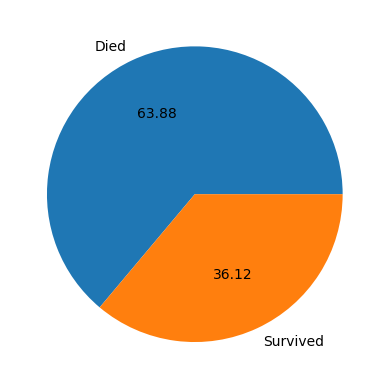

In [90]:
import matplotlib.pyplot as plt
plt.pie(final_df['Survived'].value_counts(), labels=['Died','Survived'],autopct="%0.2f")
plt.show()